In [1]:
from jax import grad
import jax.numpy as jnp
import numpy as np
import torch as tc
import torch.nn.functional as F
from numpy import *

In [2]:
a = np.random.rand(1,100000)
b=np.random.rand(1,100000)
c=tc.rand(1,100000)
d=tc.rand(1,100000)

npary = jnp.linalg.norm(a-b)
print(npary)


tcary = F.pairwise_distance(c,d,p=2)
print(tcary)

vector1 = mat([1,2,3])
vector2 = mat([4,5,6])
print (sqrt((vector1-vector2)*((vector1-vector2).T)))
print(jnp.linalg.norm(vector1-vector2))

# print(distence)

129.31601
tensor([129.1068])
[[5.19615242]]
5.196152


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


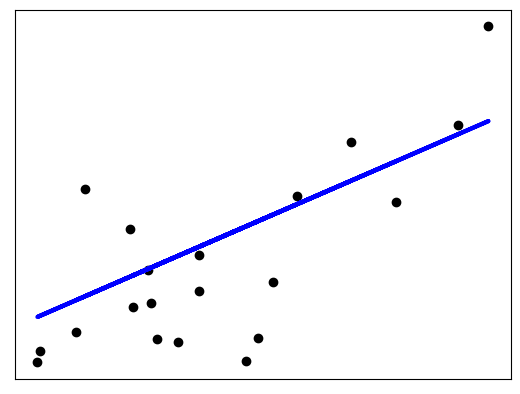

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import threading
import time

%matplotlib notebook

# 创建一个3D数组
L=10
R=9
K=5
tarL=6
tarR=5
data = np.zeros((L,R,K+1),int)
data[tarL][tarR][0] = 1

# 创建一个3D图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 初始化散点图对象
scatter = ax.scatter([tarL], [tarR], [0], marker='o',c='red', cmap='rainbow')

# 设置坐标轴标签
ax.set_xlabel('L Label')
ax.set_ylabel('R Label')
ax.set_zlabel('K Label')
ax.set_xlim3d([0, L])
ax.set_ylim3d([0, R])
ax.set_zlim3d([0, K+1])

def HorseRaid():
    global data
    L=10
    R=9
    K=5
    tarL=6
    tarR=5
    dp = np.zeros((L,R,K+1),int)
    data = dp
    dp[tarL][tarR][0] = 1
#     print(dp[tarL][tarR][0])
    time.sleep(2)
    for s in range(1,K+1):
        for curL in range(L):
            for curR in range(R):
                steps = pick(dp,curL+1,curR+2,s-1)
                steps += pick(dp,curL-1,curR+2,s-1)
                steps += pick(dp,curL+1,curR-2,s-1)
                steps += pick(dp,curL-1,curR-2,s-1)
                steps += pick(dp,curL+2,curR+1,s-1)
                steps += pick(dp,curL-2,curR+1,s-1)
                steps += pick(dp,curL+2,curR-1,s-1)
                steps += pick(dp,curL-2,curR-1,s-1)
                dp[curL][curR][s] = steps
        time.sleep(2)
#     print(dp)
    print(dp[0][0][K])
    data = dp
    return dp[0][0][K]



def pick(dp,l:int,r:int,k:int):
    if l<0 or l > 9 or r <0 or r > 8:
        return 0
    return dp[l][r][k]

# HorseRaid()



last_point = (0,0,K)
last_size = 100
last_color = 6

first_point = (tarL,tarR,0)
first_size=100
first_color= 6
# 更新散点图的函数
def update(frame):
    global data
    global K
    x, y, z = data.nonzero()

    colors = data[x, y, z]  # 添加颜色数据
    sizes = np.ones_like(x) * 20

    global last_point, last_size, last_color,first_point,first_size,first_color
    # if last_point in list(zip(x, y, z)):
    #     i = list(zip(x, y, z)).index(last_point)
    #     sizes[i] = last_size
    #     colors[i] = last_color
    # if first_point in list(zip(x, y, z)):
    #     i = list(zip(x, y, z)).index(first_point)
    #     sizes[i] = first_size
    #     colors[i] = first_color
    scatter._offsets3d = (x, y, z)
    scatter._facecolors = plt.cm.rainbow(colors)  # 设置颜色
    scatter._sizes = sizes
    scatter.set_edgecolors('face')
    scatter.set

    return scatter,



<IPython.core.display.Javascript object>

/var/folders/c9/8nybzghn5jv0xt3cx4cyr3940000gn/T/ipykernel_83023/3798941132.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter([tarL], [tarR], [0], marker='o',c='red', cmap='rainbow')


In [29]:
try:
    thread = threading.Thread(target = HorseRaid)
    thread.start()
except:
    print("Error: unable to start thread")

# 创建动画对象
ani = FuncAnimation(fig, update, frames=10, interval=2000)

# 在Notebook中显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())